In [13]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize,MinMaxScaler,StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import KFold
from fbprophet import Prophet
from neuralprophet import NeuralProphet

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re
import pickle

# Machine learning

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow_hub as hub

import catboost
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier,RandomForestRegressor,RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from catboost import CatBoostClassifier, Pool, cv
from xgboost import XGBRegressor

from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Let's be rebels and ignore warnings for now
import warnings

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [14]:
df=pd.read_csv('D:\\Data Science\\Airline-Passengers\\airline_passengers.csv')
df.head(12)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


In [15]:
df.tail(12)

,Month,Thousands of Passengers
133,1960-02,391.0
134,1960-03,419.0
135,1960-04,461.0
136,1960-05,472.0
137,1960-06,535.0
138,1960-07,622.0
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [16]:
df.dtypes

Month                       object
Thousands of Passengers    float64
dtype: object

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Thousands of Passengers,144.0,280.298611,119.966317,104.0,180.0,265.5,360.5,622.0


In [18]:
df.shape

(145, 2)

In [19]:
df.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

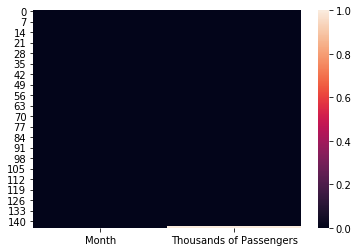

In [20]:
sns.heatmap(df.isna())
plt.show()

In [21]:
df.dropna(axis=0,inplace=True)

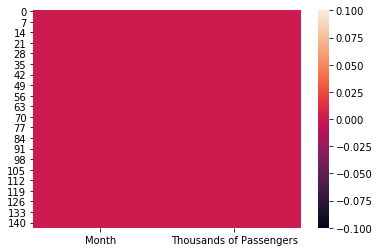

In [22]:
sns.heatmap(df.isna())
plt.show()

<Figure size 2000x500 with 0 Axes>

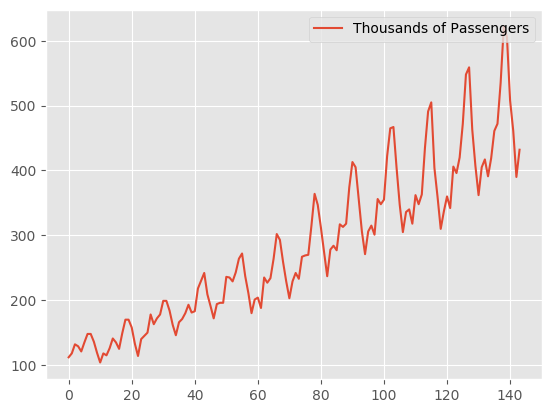

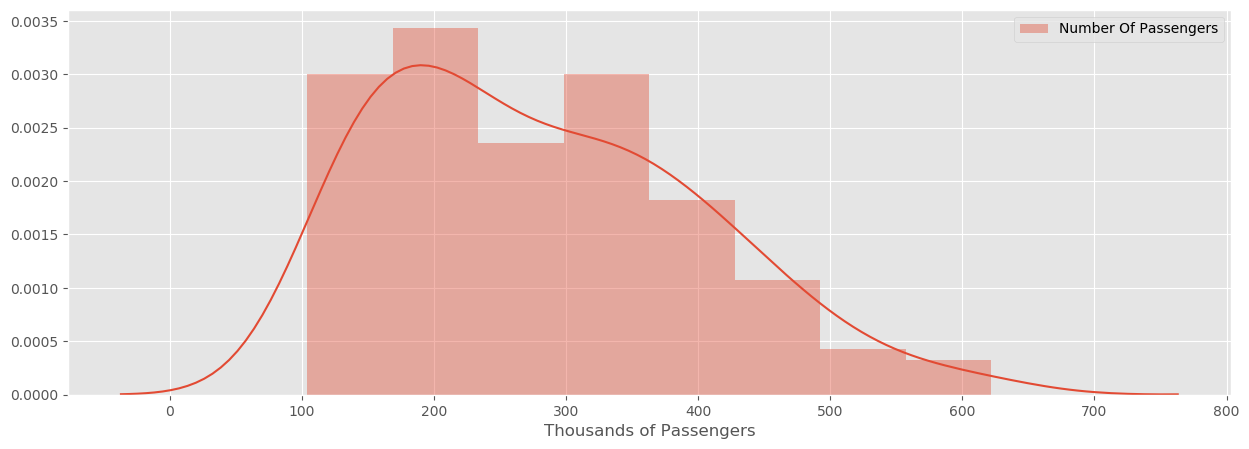

In [58]:
plt.style.use('ggplot')

plt.figure(figsize=(20,5))
df.plot()
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(15,5))
sns.distplot(df['Thousands of Passengers'],label='Number Of Passengers')
plt.legend(loc='upper right')
plt.show()

In [59]:
df.columns = ['ds','y']
df.head()

,ds,y
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [60]:
df['ds']= pd.to_datetime(df['ds'])

In [65]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [66]:
df.head(12)

,ds,y
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0
5,1949-06-01,135.0
6,1949-07-01,148.0
7,1949-08-01,148.0
8,1949-09-01,136.0
9,1949-10-01,119.0


In [67]:
df.tail(12)

,ds,y
132,1960-01-01,417.0
133,1960-02-01,391.0
134,1960-03-01,419.0
135,1960-04-01,461.0
136,1960-05-01,472.0
137,1960-06-01,535.0
138,1960-07-01,622.0
139,1960-08-01,606.0
140,1960-09-01,508.0
141,1960-10-01,461.0


In [68]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

future = m.make_future_dataframe(periods=365,freq='D')
forecast = m.predict(future)
forecast.head()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,110.728228,41.363999,127.534170,110.728228,110.728228,-26.054382,-26.054382,-26.054382,-4.556581,-4.556581,-4.556581,-21.497801,-21.497801,-21.497801,0.0,0.0,0.0,84.673846
1,1949-02-01,112.905409,33.200249,123.200491,112.905409,112.905409,-34.725010,-34.725010,-34.725010,-4.556581,-4.556581,-4.556581,-30.168428,-30.168428,-30.168428,0.0,0.0,0.0,78.180399
2,1949-03-01,114.871895,66.568320,155.561665,114.871895,114.871895,-4.994031,-4.994031,-4.994031,-4.556581,-4.556581,-4.556581,-0.437450,-0.437450,-0.437450,0.0,0.0,0.0,109.877864
3,1949-04-01,117.049075,62.820552,152.361399,117.049075,117.049075,-9.509179,-9.509179,-9.509179,-4.556581,-4.556581,-4.556581,-4.952598,-4.952598,-4.952598,0.0,0.0,0.0,107.539896
4,1949-05-01,119.156025,68.451306,156.764566,119.156025,119.156025,-8.184242,-8.184242,-8.184242,-4.556581,-4.556581,-4.556581,-3.627661,-3.627661,-3.627661,0.0,0.0,0.0,110.971782


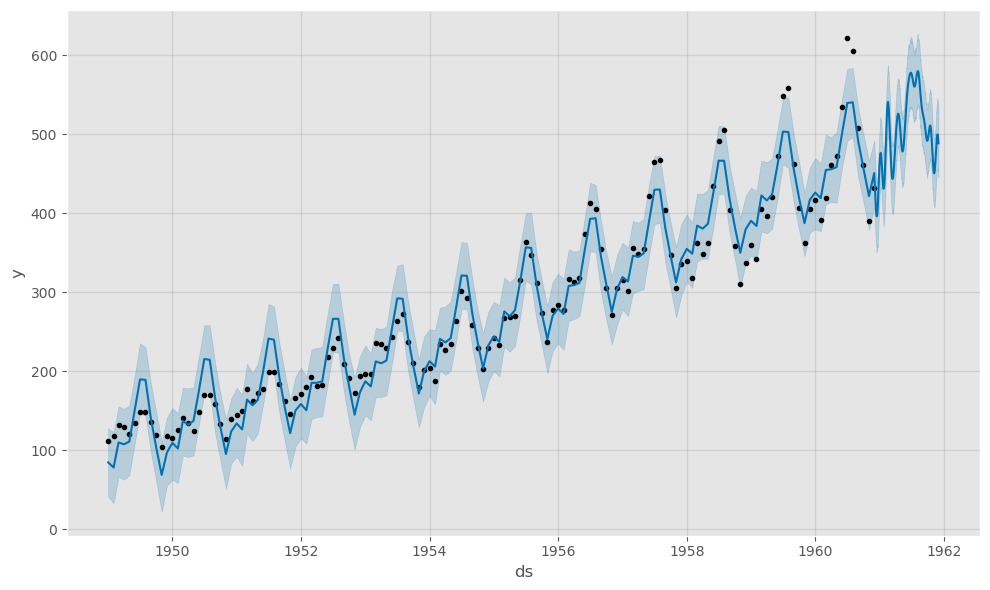

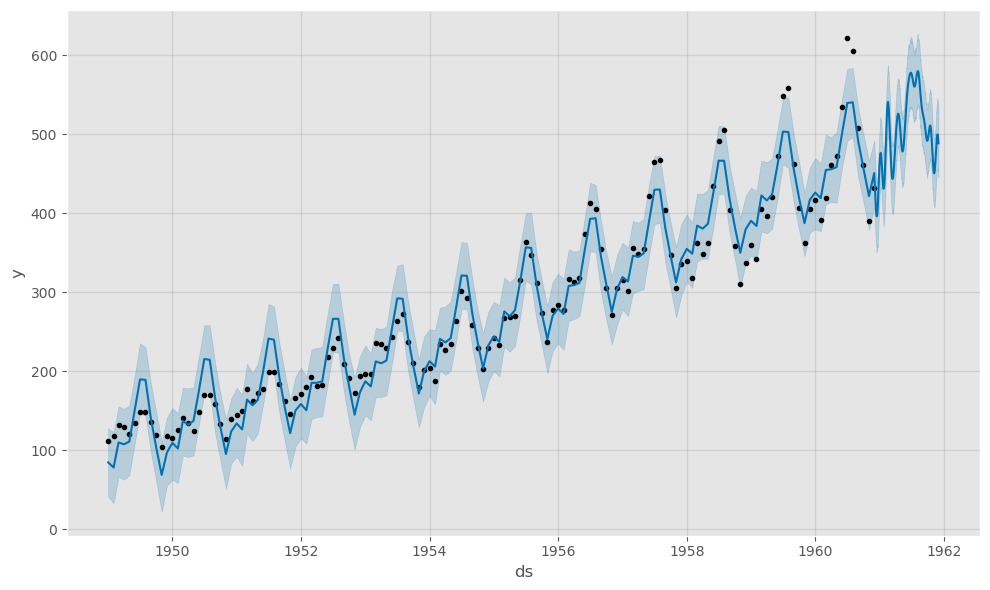

In [72]:
m.plot(forecast)

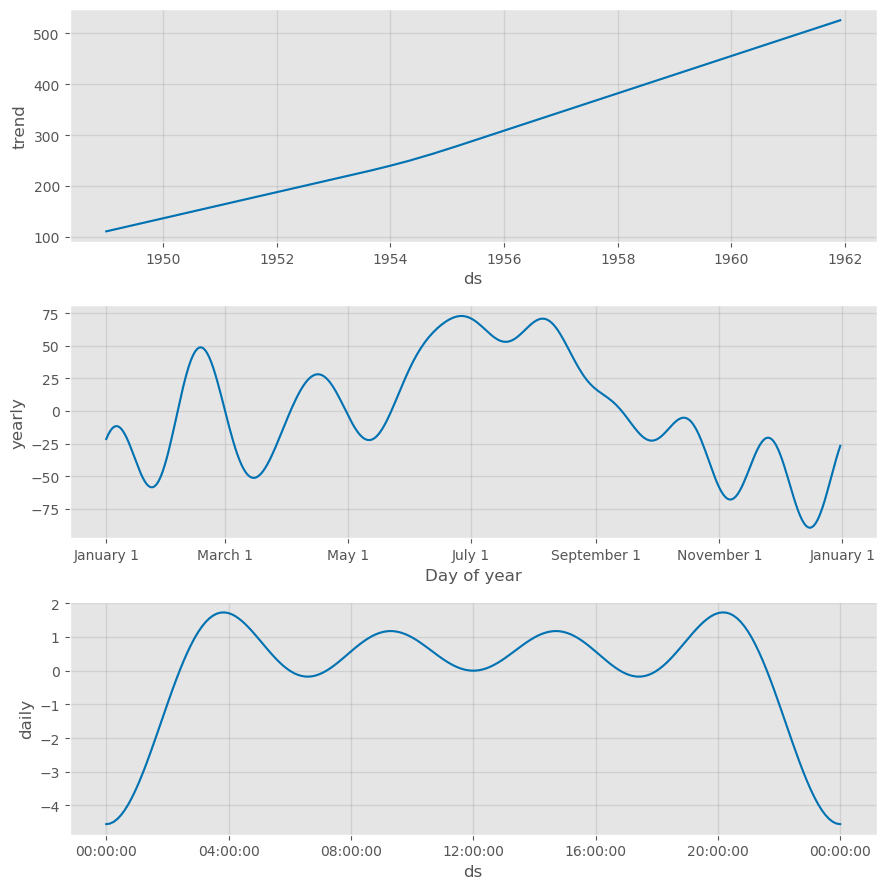

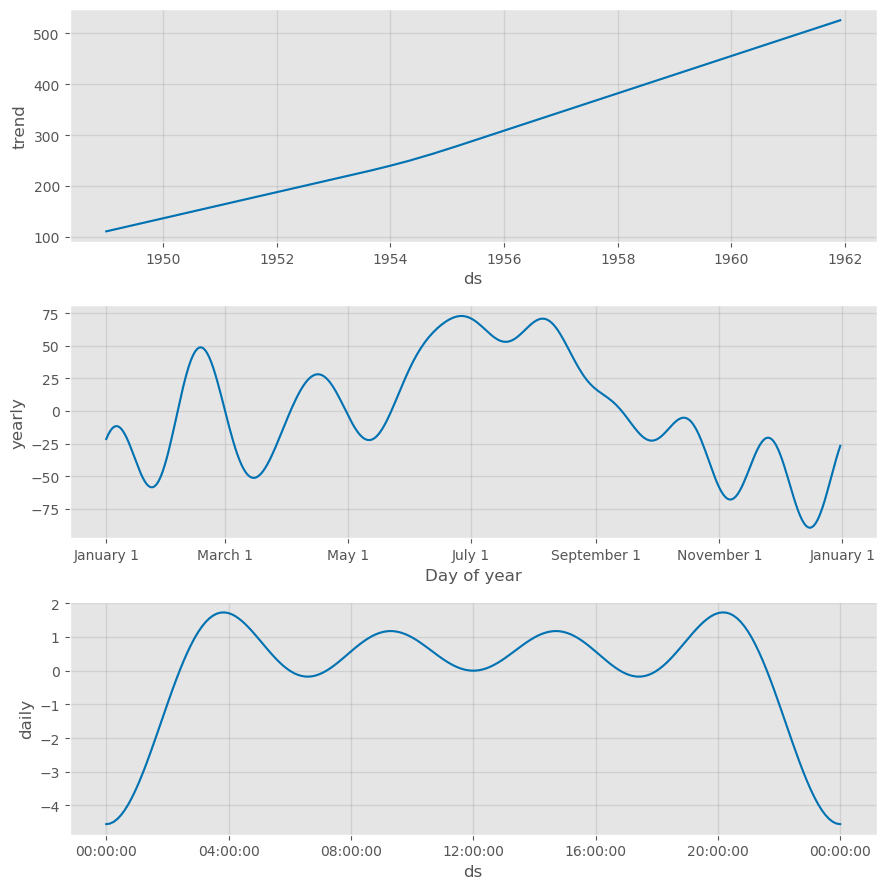

In [71]:
m.plot_components(forecast)

Time Series Analysis

1960-1962
Cross Validation
1960-61---Train dataset
1961-62--Test dataset
1962-63---Validation

In [76]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1951-02-01,157.573538,157.089268,158.113706,150.0,1951-01-18
1,1951-03-01,170.389456,169.014453,171.687792,178.0,1951-01-18
2,1951-04-01,158.598321,156.234583,160.938045,163.0,1951-01-18
3,1951-05-01,144.311741,140.932652,148.017354,172.0,1951-01-18
4,1951-06-01,179.513062,174.833660,184.716848,178.0,1951-01-18


In [77]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,40 days,1091.021483,33.030614,25.951525,0.078773,0.074083,0.409091
1,42 days,1021.237389,31.956805,25.386841,0.077422,0.074083,0.363636
2,46 days,913.747706,30.228260,24.858621,0.079694,0.084418,0.318182
3,47 days,1049.194499,32.391272,27.019401,0.082763,0.085786,0.318182
4,48 days,1037.824508,32.215284,26.411643,0.080567,0.085786,0.340909


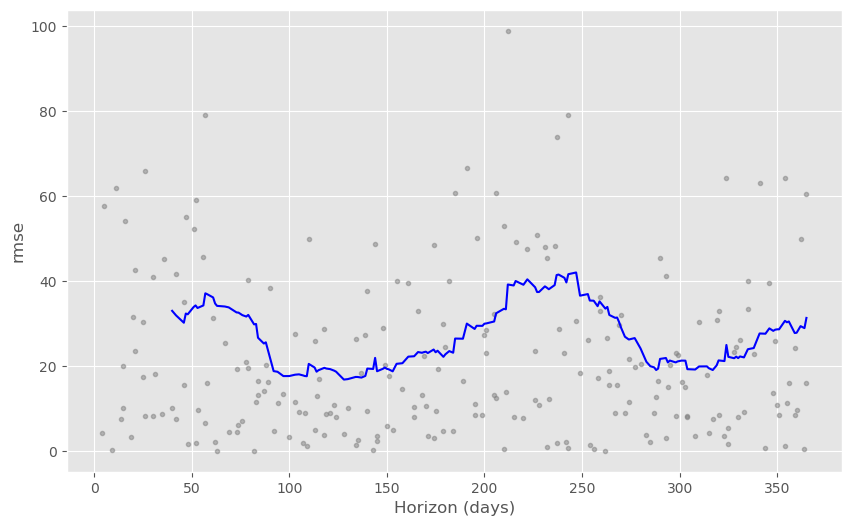

In [78]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')